# Lab 2 : Introduction: Python, Numpy, Pandas

## Exercice 1: Time series analysis with pandas

In [2]:
from os import path
import pandas as pd
import urllib.request  # Modification here
import zipfile
import sys

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [3]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
location = url + zipfilename

if not(path.isfile(zipfilename)):
    urllib.request.urlretrieve(location, zipfilename)

zipfile.ZipFile(zipfilename).extractall()

na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

In [4]:
df.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [5]:
# TSAwP - 1

# Method 1
df.info()  # Count Manually

# Method 2
print(f"Number of rows with missing values: {df.isnull().any(axis=1).sum() = }")

df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 200000 non-null  object 
 1   Time                 200000 non-null  object 
 2   Global_active_power  196268 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.6+ MB
Number of rows with missing values: df.isnull().any(axis=1).sum() = np.int64(3732)


In [6]:
# TSAwP - 2

## Set DateTimeIndex with full date and time information

df['DateTimeIndex'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

df = df.set_index('DateTimeIndex')

df.head()

,Date,Time,Global_active_power
DateTimeIndex,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666


### TSAwP - 2's answer

The DateTime format is suited for time-series analysis since it allows to do easy queries for ranges etc. with ease. Using this compared to a regular index will strengthen our code.

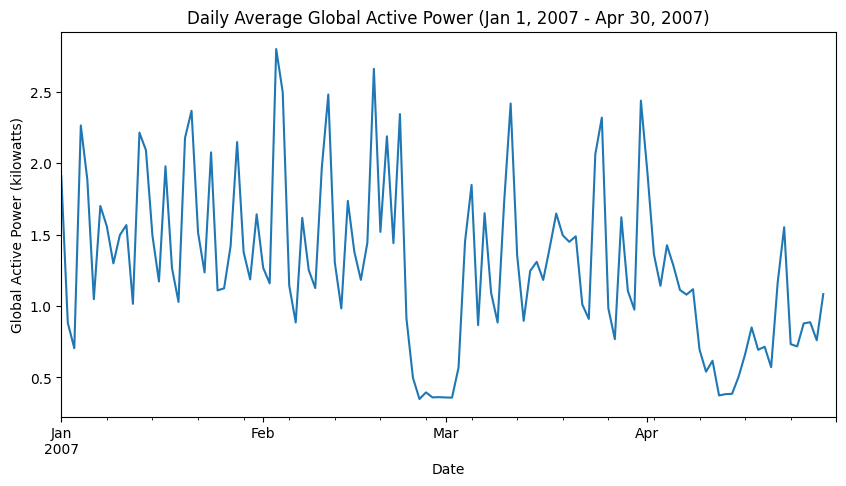

In [7]:
# TSAwP - 3

date_start = '2007-01-01'
date_end = '2007-04-30'
df_period = df.loc[date_start:date_end]

daily_avg = df_period['Global_active_power'].resample('D').mean()

plt.figure(figsize=(10, 5))
daily_avg.plot()
plt.title('Daily Average Global Active Power (Jan 1, 2007 - Apr 30, 2007)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

### TSAwP - 3's answer

???

In [8]:
# TSAwP - 4

TG_df = pd.read_csv("TG_STAID011249.txt", comment='#', skipinitialspace=True)

TG_df.columns = TG_df.columns.str.strip()

TG_df = TG_df[["DATE", "TG"]]

TG_df["TG"] = TG_df["TG"].replace(-9999, pd.NA) / 10

print(TG_df.head())
TG_df.info()

       DATE   TG
0  19210301  5.0
1  19210302  4.6
2  19210303  4.6
3  19210304  3.1
4  19210305  9.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34883 entries, 0 to 34882
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    34883 non-null  int64 
 1   TG      26496 non-null  object
dtypes: int64(1), object(1)
memory usage: 545.2+ KB


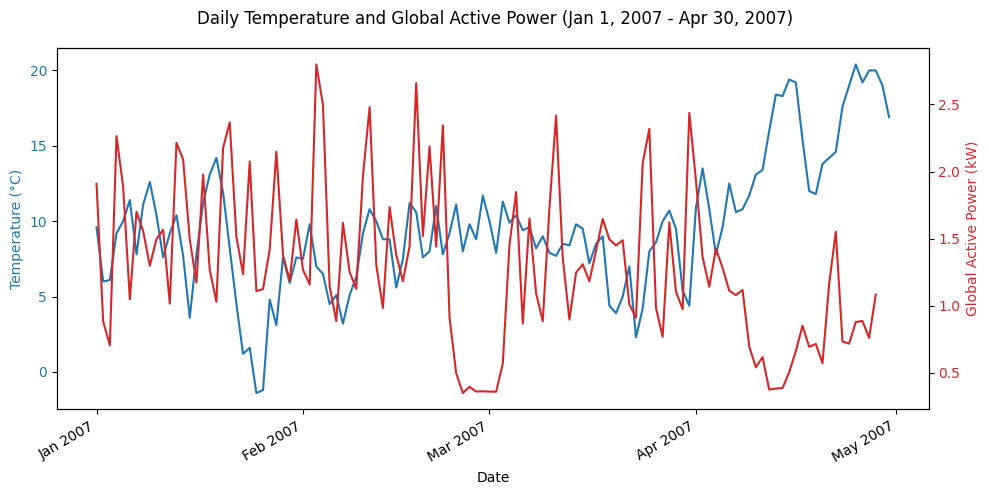

In [9]:
# TSAwP - 5

TG_df['DATE'] = pd.to_datetime(TG_df['DATE'], format='%Y%m%d')
TG_df = TG_df.set_index('DATE')

TG_period = TG_df.loc[date_start:date_end]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(TG_period.index, TG_period['TG'], color='tab:blue', label='Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Better formatting for x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

ax2 = ax1.twinx()
ax2.plot(daily_avg.index, daily_avg, color='tab:red', label='Global Active Power (kW)')
ax2.set_ylabel('Global Active Power (kW)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.suptitle('Daily Temperature and Global Active Power (Jan 1, 2007 - Apr 30, 2007)')
fig.tight_layout()
plt.show()

## Exercice 2: Linear algebra

In [10]:
pass

## Exercice 3: Random matrix spectrum

In [11]:
pass

## Exercice 4: Power method

In [23]:
X = np.random.normal(loc = 0, scale = np.sqrt(5), size = (200, 400))

In [13]:
# Pm - 11

def algorithm_1(X, T):
  v = np.random.standard_normal(size=X.shape[1])

  for _ in range(T):
    u = X@v/np.linalg.norm(X@v)
    v = X.T@u/np.linalg.norm(X.T@u)
    
  return u,v
  

u_test, v_test = algorithm_1(X, 100)

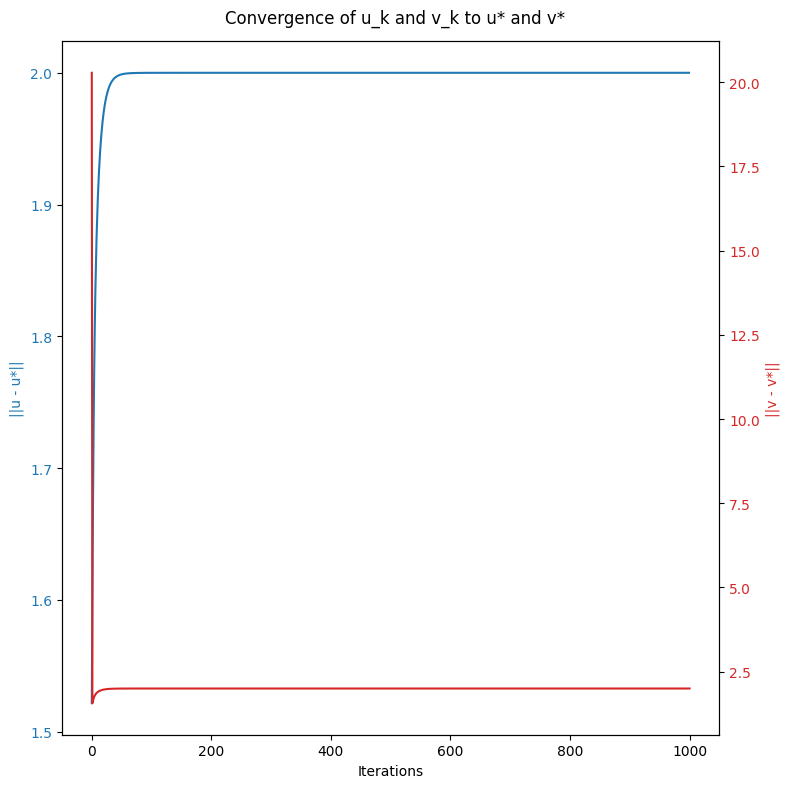

In [24]:
# Pm - 12

def algorithm_2(X, T, v_0 = None):
  v_vector = []
  u_vector = []
  
  if v_0 is None:
      v = np.random.standard_normal(size=X.shape[1])
  else:
      v = v_0
  v_vector.append(v)
  
  for _ in range(T):
    u_vector.append(X@v_vector[-1]/np.linalg.norm(X@v_vector[-1]))
    v_vector.append(X.T@u_vector[-1]/np.linalg.norm(X.T@u_vector[-1]))

  return u_vector, v_vector


u_vector, v_vector = algorithm_2(X, 1000)

U, S, Vh = np.linalg.svd(X, full_matrices=False)
u_star = U[:, 0]
v_star = Vh[0, :]

u_errors = [np.linalg.norm(u - u_star) for u in u_vector]
v_errors = [np.linalg.norm(v - v_star) for v in v_vector]


fig, ax2 = plt.subplots(figsize=(8, 8))

ax2.plot(u_errors, color='tab:blue', label='u_k')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('||u - u*||', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
  
ax2 = ax2.twinx()
ax2.plot(v_errors, color='tab:red', label='v_k')
ax2.set_ylabel('||v - v*||', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.suptitle('Convergence of u_k and v_k to u* and v*')
fig.tight_layout()
plt.show()

In [15]:
# Pm - 13

# Two initialization vectors v0: one is u*, the other is -u* (from SVD)
U, S, Vh = np.linalg.svd(X, full_matrices=False)
v_star = Vh[0, :]
v0_1 = v_star.copy()
v0_2 = -v_star.copy()

u_vec1, v_vec1 = algorithm_2(X, 100, v0_1)
u_vec2, v_vec2 = algorithm_2(X, 100, v0_2)

# Compare the last iterates to u*, v*
print('Final ||u1 - u*||:', np.linalg.norm(u_vec1[-1] - U[:,0]))
print('Final ||u2 - u*||:', np.linalg.norm(u_vec2[-1] - U[:,0]))
print('Final ||v1 - v*||:', np.linalg.norm(v_vec1[-1] - v_star))
print('Final ||v2 - v*||:', np.linalg.norm(v_vec2[-1] - v_star))

# Show that the two limits are opposite
print('u1[-1] ~ u*:', np.allclose(u_vec1[-1], U[:,0]))
print('u2[-1] ~ -u*:', np.allclose(u_vec2[-1], -U[:,0]))
print('v1[-1] ~ v*:', np.allclose(v_vec1[-1], v_star))
print('v2[-1] ~ -v*:', np.allclose(v_vec2[-1], -v_star))

# Explanation:
print("The two initialization vectors v0 = v* and v0 = -v* lead to iterates converging to u*, v* and -u*, -v* respectively. The power method converges to the leading singular vector up to sign, so the two limits are related by a sign flip.")

Final ||u1 - u*||: 8.923258051366187e-15
Final ||u2 - u*||: 1.999999999999999
Final ||v1 - v*||: 8.814693534078341e-15
Final ||v2 - v*||: 2.0
u1[-1] ~ u*: True
u2[-1] ~ -u*: True
v1[-1] ~ v*: True
v2[-1] ~ -v*: True
The two initialization vectors v0 = v* and v0 = -v* lead to iterates converging to u*, v* and -u*, -v* respectively. The power method converges to the leading singular vector up to sign, so the two limits are related by a sign flip.


In [16]:
# Pm - 14

u_vec, v_vec = algorithm_2(X, 100)

sigma_approx = np.linalg.norm(X @ v_vec[-1])
print(f"Approximate largest singular value after 100 iterations: {sigma_approx}")

U, S, Vh = np.linalg.svd(X, full_matrices=False)
print(f"True largest singular value: {S[0]}")

Approximate largest singular value after 100 iterations: 76.27759872117765
True largest singular value: 76.27760135497181


In [25]:
# Pm - 15

def algorithm_3(X, T1=100, T2=100, v0=None):
  """Approximate first and second largest singular values of X using deflation and the power method.
  """
  # First singular triplet via algorithm_2
  u_vec1, v_vec1 = algorithm_2(X, T1, v0)
  u1 = u_vec1[-1]
  v1 = v_vec1[-1]
  sigma1 = np.linalg.norm(X @ v1)

  # Deflate X
  X_def = X - sigma1 * np.outer(u1, v1)

  # Second singular triplet via power method on deflated matrix
  u_vec2, v_vec2 = algorithm_2(X_def, T2)
  u2 = u_vec2[-1]
  v2 = v_vec2[-1]
  sigma2 = np.linalg.norm(X_def @ v2)

  return sigma1, sigma2, u1, v1, u2, v2

sigma1_a, sigma2_a, u1_a, v1_a, u2_a, v2_a = algorithm_3(X, T1=200, T2=200)

U, S, Vh = np.linalg.svd(X, full_matrices=False)
print(f"Power approx sigma1: {sigma1_a:.6f}, sigma2: {sigma2_a:.6f}")
print(f"SVD true sigma1: {S[0]:.6f}, sigma2: {S[1]:.6f}")

Power approx sigma1: 75.816486, sigma2: 74.791042
SVD true sigma1: 75.816487, sigma2: 74.791043


## Exercice 5: Analysis of the <em>auto-mpg</em> dataset

In [18]:
# Aotamd - 16

import shlex

names = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"

# Check impact of sep=r"\s+" vs default
try:
    pd.read_csv(url, sep=r"\s+", names=names, engine="python")
    sep_check = "ok"
except Exception as e:
    sep_check = f"error:{type(e).__name__}"
try:
    df_default = pd.read_csv(url, names=names, header=None)
    default_cols = df_default.shape[1]
except Exception as e:
    default_cols = f"error:{type(e).__name__}"
print("sep=r'\\s+' check:", sep_check, "| default sep columns:", default_cols)

# Robust load respecting quoted car_name
with urllib.request.urlopen(url) as r:
    lines = r.read().decode("utf-8", "replace").splitlines()
rows = []
for line in lines:
    line = line.strip()
    if not line:
        continue
    parts = shlex.split(line)
    if len(parts) >= 9:
        rows.append(parts[:8] + [" ".join(parts[8:])])
df = pd.DataFrame(rows, columns=names)

# Missing values and drop car_name
num = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]
df[num] = df[num].replace("?", pd.NA).apply(pd.to_numeric, errors="coerce")
df = df.dropna(subset=num).drop(columns=["car_name"])

df.head()

sep=r'\s+' check: error:ParserError | default sep columns: 9


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [19]:
# Aotamd - 17

df["origin_usa"] = (df["origin"] == 1).astype("int8")
df["origin_europe"] = (df["origin"] == 2).astype("int8")
df["origin_japan"] = (df["origin"] == 3).astype("int8")

df[["origin","origin_usa","origin_europe","origin_japan"]].sample(10)

,origin,origin_usa,origin_europe,origin_japan
208,1.0,1,0,0
65,1.0,1,0,0
108,1.0,1,0,0
50,1.0,1,0,0
146,1.0,1,0,0
248,3.0,0,0,1
261,1.0,1,0,0
98,1.0,1,0,0
275,3.0,0,0,1
132,1.0,1,0,0


In [20]:
# Aotamd - 18

sel = (
    df.sort_values(["origin", "model_year"]) \
      .drop_duplicates(["origin", "model_year"]) \
      .groupby("origin", group_keys=False) \
      .head(3)
)

#print(sel.head(9))  # verification

features = [
    "cylinders","displacement","horsepower","weight",
    "acceleration","model_year","origin_usa","origin_europe","origin_japan"
]
X = np.column_stack([np.ones(len(sel)), sel[features].to_numpy()])
y = sel["mpg"].to_numpy()

theta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
y_hat = X @ theta

print(f"theta shape: {theta.shape}, rank: {rank}, residual norm: {float(np.linalg.norm(y - y_hat))}")
print("y:", np.round(y,3).tolist())
print("ŷ:", np.round(y_hat,3).tolist())

theta shape: (10,), rank: 9, residual norm: 5.946480227317432e-11
y: [18.0, 28.0, 25.0, 26.0, 28.0, 23.0, 24.0, 27.0, 24.0]
ŷ: [18.0, 28.0, 25.0, 26.0, 28.0, 23.0, 24.0, 27.0, 24.0]


### Aotamd - 18's answer (GPT)

Observation: On the 9 selected rows, least squares gives essentially zero residuals; the predictions match the true mpg (ŷ = y).

Why: The design matrix has an intercept and three origin dummies that sum to one, so there is a linear dependence (dummy-variable trap). Its effective rank is 9. With 9 samples and rank 9, the hat matrix becomes the identity and least squares interpolates the data exactly, hence ŷ = y.

In [21]:
# Aotamd - 19

features = [
    "cylinders","displacement","horsepower","weight",
    "acceleration","model_year","origin_usa","origin_europe","origin_japan"
]
X = df[features].copy()
X_std = (X - X.mean()) / X.std(ddof=0)
X_design = np.column_stack([np.ones(len(X_std)), X_std.to_numpy()])
y = df["mpg"].to_numpy()

theta, residuals, rank, s = np.linalg.lstsq(X_design, y, rcond=None)
y_hat = X_design @ theta

coef = pd.Series(theta[1:], index=features).sort_values(key=lambda v: v.abs(), ascending=False)

print(f"top coefficients (std X): \n{coef}")
print("y:", np.round(y[:10],1).tolist())
print("ŷ:", np.round(y_hat[:10], 1).tolist())

top coefficients (std X): 
weight          -5.692543
model_year       2.858709
displacement     2.506019
cylinders       -0.834272
origin_usa      -0.751539
horsepower      -0.699009
origin_japan     0.521830
origin_europe    0.408048
acceleration     0.217956
dtype: float64
y: [18.0, 15.0, 18.0, 16.0, 17.0, 15.0, 14.0, 14.0, 14.0, 15.0]
ŷ: [15.0, 14.0, 15.2, 15.0, 14.9, 10.9, 10.9, 10.9, 10.4, 13.3]


### Aotamd - 19's answer (GPT)

- Variables that best explain mpg (by |β| on standardized X): weight (most negative), model_year (positive), displacement (positive); then cylinders and horsepower (negative); origin dummies capture regional shifts; acceleration is weakest.
- Why normalize X: Without standardization, coefficient magnitudes depend on units (e.g., pounds vs. liters), so large-scale variables dominate |β| for purely numerical reasons; with zero-mean/unit-variance features, |β| reflects effect per 1 SD change and is comparable across variables.

In [22]:
# Aotamd - 20

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[features]
y = df["mpg"]

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])
pipe.fit(X, y)

new_year = 2017 - 1900
new_row = {
    "cylinders": 6,
    "displacement": 225,
    "horsepower": 100,
    "weight": 3233,
    "acceleration": 15.4,
    "model_year": float(2017 - 1900),  # Encode consistently with dataset (year since 1900) 
    "origin_usa": 1,
    "origin_europe": 0,
    "origin_japan": 0,
}
new_X = pd.DataFrame([new_row], columns=features)
new_pred = pipe.predict(new_X)[0]

print("Predicted mpg for new car:", np.round(new_pred, 2))

Predicted mpg for new car: 53.12


### Aotamd - 20's answer

- The result is of course coherent with the previous dataset. The issue we meet here is that the technology is much more different due to the year of release (2017 vs 70-82).
- That taken into account, we could imagine that on a broader dataset, the model year would maybe outweight the wieght and thus may lower the mpg prediction on this specific row.

# End.